In [54]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [55]:
#Lendo a base de dados de 2018 e removendo os campos nulos
df_2018 = pd.read_csv('2018.CSV', delimiter=';', encoding='utf-8')
df_2018 = df_2018.dropna()

In [56]:
#Lendo a base de dados de 2019 e removendo os campos nulos
df_2019 = pd.read_csv('2019.CSV', delimiter=';', encoding='utf-8')
df_2019= df_2019.dropna()

In [57]:
#Lendo a base de dados de 2020 e removendo os campos nulos
df_2020 = pd.read_csv('2020.CSV', delimiter=';', encoding='utf-8')
df_2020 = df_2020.dropna()

In [58]:
#Lendo a base de dados de 2021 e removendo os campos nulos
df_2021 = pd.read_csv('2021.CSV', delimiter=';', encoding='utf-8')
df_2021 = df_2021.dropna()

In [59]:
#Lendo a base de dados de 2022 e removendo os campos nulos
df_2022 = pd.read_csv('2022.CSV', delimiter=';', encoding='utf-8')
df_2022 = df_2022.dropna()

In [60]:
#Lendo a base de dados de 2023 e removendo os campos nulos
df_2023 = pd.read_csv('2023.CSV', delimiter=';', encoding='utf-8')
df_2023 = df_2023.dropna()

In [61]:
#Lendo a base de dados de 2024 e removendo os campos nulos
df_2024 = pd.read_csv('2024.CSV', delimiter=';', encoding='utf-8')
df_2024 =  df_2024.dropna()

In [62]:
#Fazendo as junção das bases usando a função concat
df_combinado_financeiro = pd.concat([df_2018, df_2019,df_2020,df_2021,df_2022,df_2023,df_2024], ignore_index=True)
df_combinado_financeiro

,Data,Vencimento,Comanda,Categoria,Descrição,Realizado,Valor
0,01/04/2018,01/04/2018,5.0,Pagamento,Dinheiro,Sim,"R$ 100,00"
1,01/04/2018,01/04/2018,4.0,Pagamento,Dinheiro,Sim,"R$ 100,00"
2,06/04/2018,06/04/2018,6.0,Pagamento,Crédito Visa Master 1x,Sim,"R$ 102,00"
3,10/04/2018,12/04/2018,17.0,Pagamento,Cartão de Débito,Sim,"R$ 30,00"
4,10/04/2018,11/04/2018,9.0,Pagamento,Débito Visa Master,Sim,"R$ 110,00"
...,...,...,...,...,...,...,...
8195,09/01/2024,09/01/2024,13417.0,Pagamento,Link mercado pago - 3x antec.,Não,"R$ 561,80"
8196,09/01/2024,09/01/2024,13416.0,Pagamento,Link mercado pago,Não,"R$ 330,00"
8197,09/01/2024,09/01/2024,13413.0,Pagamento,Ton visa e master crédito 1x,Não,"R$ 170,00"
8198,08/12/2023,08/01/2024,13359.0,Pagamento,Ton visa/master parcelado - 2/3,Não,"R$ 58,33"


In [63]:
#Transformando a coluna 'Data' em datetime
df_combinado_financeiro['Data'] = pd.to_datetime(df_combinado_financeiro['Data'], errors='coerce',dayfirst=True)

In [64]:
#Transformando a coluna 'Vencimento em datetime
df_combinado_financeiro['Vencimento'] = pd.to_datetime(df_combinado_financeiro['Vencimento'], errors='coerce',dayfirst=True)

In [65]:
#Transformando a coluna 'Comanda' em to_numeric e convertendo para int com astype(int)
df_combinado_financeiro['Comanda'] = pd.to_numeric(df_combinado_financeiro['Comanda'], errors='coerce').astype(int)

In [66]:
#Limpando a coluna 'Valor' removendo o 'R$' e substituindo o ',' por '.'
df_combinado_financeiro['Valor'] = df_combinado_financeiro['Valor'].str.replace('R$','')
df_combinado_financeiro['Valor'] = df_combinado_financeiro['Valor'].str.replace(',','.')


In [67]:
#Transformando a coluna 'Valor' em to_numeric
df_combinado_financeiro['Valor'] = pd.to_numeric(df_combinado_financeiro['Valor'], errors='coerce')

In [68]:
#Verificando a df_combinado_financeiro
df_combinado_financeiro

,Data,Vencimento,Comanda,Categoria,Descrição,Realizado,Valor
0,2018-04-01,2018-04-01,5,Pagamento,Dinheiro,Sim,100.00
1,2018-04-01,2018-04-01,4,Pagamento,Dinheiro,Sim,100.00
2,2018-04-06,2018-04-06,6,Pagamento,Crédito Visa Master 1x,Sim,102.00
3,2018-04-10,2018-04-12,17,Pagamento,Cartão de Débito,Sim,30.00
4,2018-04-10,2018-04-11,9,Pagamento,Débito Visa Master,Sim,110.00
...,...,...,...,...,...,...,...
8195,2024-01-09,2024-01-09,13417,Pagamento,Link mercado pago - 3x antec.,Não,561.80
8196,2024-01-09,2024-01-09,13416,Pagamento,Link mercado pago,Não,330.00
8197,2024-01-09,2024-01-09,13413,Pagamento,Ton visa e master crédito 1x,Não,170.00
8198,2023-12-08,2024-01-08,13359,Pagamento,Ton visa/master parcelado - 2/3,Não,58.33


In [69]:
#Verificando se a campos nulos 
df_combinado_financeiro.isnull().sum()

Data           0
Vencimento     0
Comanda        0
Categoria      0
Descrição      0
Realizado      0
Valor         51
dtype: int64

In [70]:
#Verificando os tipos de dados de cada coluna
df_combinado_financeiro.dtypes

Data          datetime64[ns]
Vencimento    datetime64[ns]
Comanda                int64
Categoria             object
Descrição             object
Realizado             object
Valor                float64
dtype: object

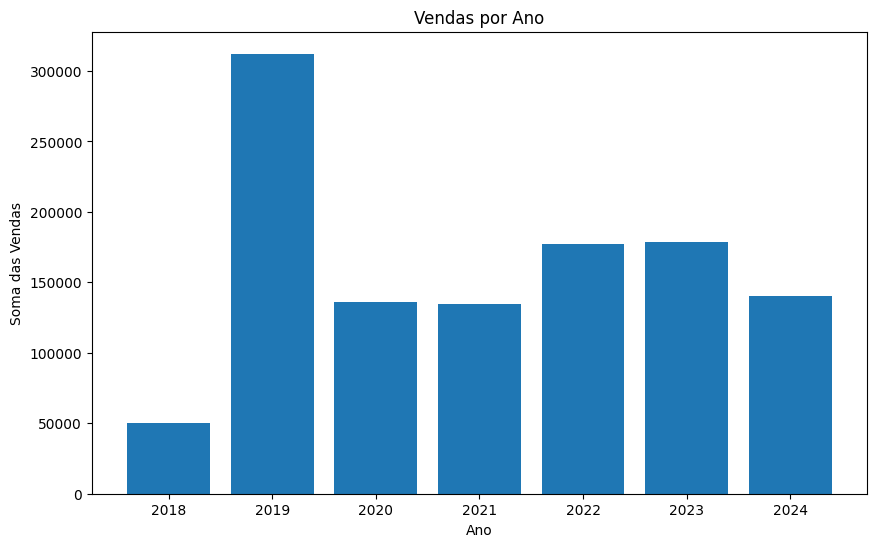

In [71]:
#Filtrando a data pegando apenas o ano
df_data = df_combinado_financeiro['Data'].dt.year

#Definindo tamanho do gráfico
plt.figure(figsize=(10, 6))

# Agrupando os dados por ano e calculando a soma das vendas
df_grouped = df_combinado_financeiro.groupby(df_data)['Valor'].sum()

# Criando o gráfico de barras
plt.bar(df_grouped.index, df_grouped.values)
plt.xlabel('Ano')
plt.ylabel('Soma das Vendas')
plt.title('Vendas por Ano')
plt.show()

In [72]:
#Lendo os dados do banco de dados 'pacientes1'
df_pacientes1 = pd.read_csv('pacientes1.CSV', delimiter=';', encoding='latin')
df_pacientes1.head()

,Código,Cidade,Estado,Data de Nascimento,Sexo,Saldo,Faturado,Visitas,Ultima Visita
0,7847,NaN,NaN,NaN,NaN,0,170,1,13/07/2024
1,7939,NaN,NaN,NaN,NaN,0,0,1,30/08/2024
2,7869,NaN,NaN,NaN,NaN,0,170,1,24/07/2024
3,7652,NaN,NaN,NaN,Feminino,0,159,1,27/03/2024
4,4411,NaN,NaN,NaN,NaN,0,130,1,02/05/2021


In [73]:
#Lendo os dados do banco de dados 'pacientes2'
df_pacientes2 = pd.read_csv('pacientes2.CSV', delimiter=';', encoding='latin')
df_pacientes2.head()

,Código,Cidade,Estado,Data de Nascimento,Sexo,Saldo,Faturado,Visitas,Ultima Visita
0,4970,NaN,NaN,NaN,Feminino,"R$ 38,00","R$ 2.000,00",9,22/10/2021
1,7071,NaN,NaN,NaN,Feminino,"R$ 0,00",237.5,1,24/05/2023
2,4236,NaN,NaN,NaN,Feminino,"R$ 0,00","R$ 0,00",1,10/12/2020
3,3860,São Paulo,SP,23/10/1977,Feminino,"R$ 0,00",1012.9,14,09/04/2022
4,4720,NaN,NaN,NaN,Feminino,"R$ 0,00","R$ 0,00",1,16/06/2021


In [74]:
#Fazendo a junção dos dois bancos com a função concat
df_combinado_pacientes = pd.concat([df_pacientes1, df_pacientes2], ignore_index=True)
df_combinado_pacientes

,Código,Cidade,Estado,Data de Nascimento,Sexo,Saldo,Faturado,Visitas,Ultima Visita
0,7847,NaN,NaN,NaN,NaN,0,170,1,13/07/2024
1,7939,NaN,NaN,NaN,NaN,0,0,1,30/08/2024
2,7869,NaN,NaN,NaN,NaN,0,170,1,24/07/2024
3,7652,NaN,NaN,NaN,Feminino,0,159,1,27/03/2024
4,4411,NaN,NaN,NaN,NaN,0,130,1,02/05/2021
...,...,...,...,...,...,...,...,...,...
7199,7702,NaN,NaN,NaN,NaN,"R$ 0,00","R$ 500,00",2,20/04/2024
7200,7704,NaN,NaN,NaN,Feminino,"R$ 0,00","R$ 185,00",1,20/04/2024
7201,6678,São Bernardo do Campo,SP,NaN,Feminino,"R$ 0,00","R$ 624,00",1,20/02/2023
7202,5694,NaN,NaN,NaN,NaN,"R$ 0,00",237.5,2,12/01/2022


In [75]:
#Transformando a coluna'Data de Nascimento' para datetime
df_combinado_pacientes['Data de Nascimento'] = pd.to_datetime(df_combinado_pacientes['Data de Nascimento'], errors='coerce',dayfirst=True)

In [76]:
#Limpando a coluna "Saldo" removendo o 'R$' e substituindo o ',' por '.'
df_combinado_pacientes['Saldo'] = df_combinado_pacientes['Saldo'].str.replace('R$','')
df_combinado_pacientes['Saldo'] = df_combinado_pacientes['Saldo'].str.replace(',','.')

In [77]:
#Transofrmando a coluna 'Saldo' em to_numeric
df_combinado_pacientes['Saldo'] = pd.to_numeric(df_combinado_pacientes['Saldo'], errors='coerce')

In [78]:
#Limpando a coluna "Faturado" removendo o 'R$' e substituindo o ',' por '.'
df_combinado_pacientes['Faturado'] = df_combinado_pacientes['Faturado'].str.replace('R$','')
df_combinado_pacientes['Faturado'] = df_combinado_pacientes['Faturado'].str.replace(',','.')

In [79]:
#Transofrmando a coluna 'Faturado' em to_numeric
df_combinado_pacientes['Faturado'] = pd.to_numeric(df_combinado_pacientes['Faturado'], errors='coerce')

In [80]:
#Verificando os tipos de dados de cada coluna
df_combinado_pacientes.dtypes

Código                         int64
Cidade                        object
Estado                        object
Data de Nascimento    datetime64[ns]
Sexo                          object
Saldo                        float64
Faturado                     float64
Visitas                        int64
Ultima Visita                 object
dtype: object

In [81]:
#verificando a df_combinado_pacientes
df_combinado_pacientes

,Código,Cidade,Estado,Data de Nascimento,Sexo,Saldo,Faturado,Visitas,Ultima Visita
0,7847,NaN,NaN,NaT,NaN,0.0,170.0,1,13/07/2024
1,7939,NaN,NaN,NaT,NaN,0.0,0.0,1,30/08/2024
2,7869,NaN,NaN,NaT,NaN,0.0,170.0,1,24/07/2024
3,7652,NaN,NaN,NaT,Feminino,0.0,159.0,1,27/03/2024
4,4411,NaN,NaN,NaT,NaN,0.0,130.0,1,02/05/2021
...,...,...,...,...,...,...,...,...,...
7199,7702,NaN,NaN,NaT,NaN,0.0,500.0,2,20/04/2024
7200,7704,NaN,NaN,NaT,Feminino,0.0,185.0,1,20/04/2024
7201,6678,São Bernardo do Campo,SP,NaT,Feminino,0.0,624.0,1,20/02/2023
7202,5694,NaN,NaN,NaT,NaN,0.0,237.5,2,12/01/2022


In [82]:
#Transformando a coluna 'ultima Visita em datetime
df_combinado_pacientes['Ultima Visita'] = pd.to_datetime(df_combinado_pacientes['Ultima Visita'], errors='coerce',dayfirst=True)

In [83]:
#Substituindo os campos nulos por 0 na coluna 'Saldo'
df_combinado_pacientes['Saldo'] = df_combinado_pacientes['Saldo'].fillna(0)

In [84]:
#Substituindo os campos nulos por 0 na coluna "Faturado"
df_combinado_pacientes['Faturado'] = df_combinado_pacientes['Faturado'].fillna(0)

In [85]:
import datetime as dt

In [86]:
#calculando tempo da última visita até a data atual.
hoje = dt.datetime.today()
df_combinado_pacientes['Tempo_Desde_Ultima_Visita'] = hoje - df_combinado_pacientes['Ultima Visita']

# Convertendo o resultado para dias
df_combinado_pacientes['Tempo_Desde_Ultima_Visita'] = df_combinado_pacientes['Tempo_Desde_Ultima_Visita'].dt.days

# Identificando clientes com apenas uma visita
clientes_uma_vez = df_combinado_pacientes[df_combinado_pacientes['Visitas'] == 1]

# Analisando os clientes que vieram uma única vez
print(clientes_uma_vez[['Código', 'Ultima Visita', 'Tempo_Desde_Ultima_Visita']])



# Convertendo o tempo para meses e dias
def dias_para_meses_e_dias(dias):
    meses, resto = divmod(dias, 30)  # Considerando um mês com 30 dias para simplificar
    return meses, resto

df_combinado_pacientes['Meses'] = df_combinado_pacientes['Tempo_Desde_Ultima_Visita'].apply(dias_para_meses_e_dias).str[0]
df_combinado_pacientes['Dias'] = df_combinado_pacientes['Tempo_Desde_Ultima_Visita'].apply(dias_para_meses_e_dias).str[1]
# Analisando o tempo médio desde a última visita para clientes com uma visita

print(clientes_uma_vez['Tempo_Desde_Ultima_Visita'].mean())

# Exibindo o DataFrame com as novas colunas
print(df_combinado_pacientes[['Código', 'Ultima Visita', 'Tempo_Desde_Ultima_Visita', 'Meses', 'Dias']])

      Código Ultima Visita  Tempo_Desde_Ultima_Visita
0       7847    2024-07-13                       91.0
1       7939    2024-08-30                       43.0
2       7869    2024-07-24                       80.0
3       7652    2024-03-27                      199.0
4       4411    2021-05-02                     1259.0
...      ...           ...                        ...
7197    5278    2021-09-21                     1117.0
7198    7060    2023-05-26                      505.0
7200    7704    2024-04-20                      175.0
7201    6678    2023-02-20                      600.0
7203    6696    2022-11-26                      686.0

[5381 rows x 3 columns]
1347.8614783094397
      Código Ultima Visita  Tempo_Desde_Ultima_Visita  Meses  Dias
0       7847    2024-07-13                       91.0    3.0   1.0
1       7939    2024-08-30                       43.0    1.0  13.0
2       7869    2024-07-24                       80.0    2.0  20.0
3       7652    2024-03-27              

In [87]:
#Transofrmando a coluna 'Faturado' em to_numeric
df_combinado_pacientes['Tempo_Desde_Ultima_Visita'] = df_combinado_pacientes['Tempo_Desde_Ultima_Visita'].fillna(0)
df_combinado_pacientes['Meses'] = df_combinado_pacientes['Meses'].fillna(0)
df_combinado_pacientes['Dias'] = df_combinado_pacientes['Dias'].fillna(0)

In [88]:
#Transofrmando a coluna 'Faturado' em to_numeric
df_combinado_pacientes['Tempo_Desde_Ultima_Visita'] = df_combinado_pacientes['Tempo_Desde_Ultima_Visita'].astype(int)
df_combinado_pacientes['Meses'] = df_combinado_pacientes['Meses'].astype(int)
df_combinado_pacientes['Dias'] = df_combinado_pacientes['Dias'].astype(int)

In [89]:
df_combinado_pacientes.dtypes

Código                                int64
Cidade                               object
Estado                               object
Data de Nascimento           datetime64[ns]
Sexo                                 object
Saldo                               float64
Faturado                            float64
Visitas                               int64
Ultima Visita                datetime64[ns]
Tempo_Desde_Ultima_Visita             int64
Meses                                 int64
Dias                                  int64
dtype: object

In [90]:
df_combinado_pacientes.head()

,Código,Cidade,Estado,Data de Nascimento,Sexo,Saldo,Faturado,Visitas,Ultima Visita,Tempo_Desde_Ultima_Visita,Meses,Dias
0,7847,NaN,NaN,NaT,NaN,0.0,170.0,1,2024-07-13,91,3,1
1,7939,NaN,NaN,NaT,NaN,0.0,0.0,1,2024-08-30,43,1,13
2,7869,NaN,NaN,NaT,NaN,0.0,170.0,1,2024-07-24,80,2,20
3,7652,NaN,NaN,NaT,Feminino,0.0,159.0,1,2024-03-27,199,6,19
4,4411,NaN,NaN,NaT,NaN,0.0,130.0,1,2021-05-02,1259,41,29


In [91]:
# Criando a coluna idade, calculando a idade apartir da coluna 'Data de nascimento'.
from datetime import date
def calcular_idade(nascimento):
    hoje = date.today()
    return hoje.year - nascimento.year - ((hoje.month, hoje.day) < (nascimento.month, nascimento.day))

df_combinado_pacientes['Idade'] = df_combinado_pacientes['Data de Nascimento'].apply(calcular_idade)

In [92]:
#Coluna para identificar cliente pessoas, fisica e juridica
df_combinado_pacientes['Tipo'] = np.where(df_combinado_pacientes['Sexo'].isnull(), 'B2B', 'B2C')

In [93]:
df_combinado_pacientes

,Código,Cidade,Estado,Data de Nascimento,Sexo,Saldo,Faturado,Visitas,Ultima Visita,Tempo_Desde_Ultima_Visita,Meses,Dias,Idade,Tipo
0,7847,NaN,NaN,NaT,NaN,0.0,170.0,1,2024-07-13,91,3,1,NaN,B2B
1,7939,NaN,NaN,NaT,NaN,0.0,0.0,1,2024-08-30,43,1,13,NaN,B2B
2,7869,NaN,NaN,NaT,NaN,0.0,170.0,1,2024-07-24,80,2,20,NaN,B2B
3,7652,NaN,NaN,NaT,Feminino,0.0,159.0,1,2024-03-27,199,6,19,NaN,B2C
4,4411,NaN,NaN,NaT,NaN,0.0,130.0,1,2021-05-02,1259,41,29,NaN,B2B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7199,7702,NaN,NaN,NaT,NaN,0.0,500.0,2,2024-04-20,175,5,25,NaN,B2B
7200,7704,NaN,NaN,NaT,Feminino,0.0,185.0,1,2024-04-20,175,5,25,NaN,B2C
7201,6678,São Bernardo do Campo,SP,NaT,Feminino,0.0,624.0,1,2023-02-20,600,20,0,NaN,B2C
7202,5694,NaN,NaN,NaT,NaN,0.0,237.5,2,2022-01-12,1004,33,14,NaN,B2B


In [95]:
#Criando a faixa etária de idade 

df_combinado_pacientes.loc[df_combinado_pacientes['Idade'] == 'NaN' , 'grupo_idade'] = ''
df_combinado_pacientes.loc[(df_combinado_pacientes['Idade'] >= 15) & (df_combinado_pacientes['Idade'] < 20), 'grupo_idade'] = '15-19'
df_combinado_pacientes.loc[(df_combinado_pacientes['Idade'] >= 20) & (df_combinado_pacientes['Idade'] < 24), 'grupo_idade'] = '19-23'
df_combinado_pacientes.loc[(df_combinado_pacientes['Idade'] >= 24) & (df_combinado_pacientes['Idade'] < 29), 'grupo_idade'] = '24-28'
df_combinado_pacientes.loc[(df_combinado_pacientes['Idade'] >= 29) & (df_combinado_pacientes['Idade'] < 34), 'grupo_idade'] = '29-33'
df_combinado_pacientes.loc[(df_combinado_pacientes['Idade'] >= 34) & (df_combinado_pacientes['Idade'] < 39), 'grupo_idade'] = '34-38'
df_combinado_pacientes.loc[(df_combinado_pacientes['Idade'] >= 39) & (df_combinado_pacientes['Idade'] < 44), 'grupo_idade'] = '39-43'
df_combinado_pacientes.loc[(df_combinado_pacientes['Idade'] >= 44) & (df_combinado_pacientes['Idade'] < 49), 'grupo_idade'] = '44-48'
df_combinado_pacientes.loc[(df_combinado_pacientes['Idade'] >= 49) & (df_combinado_pacientes['Idade'] < 54), 'grupo_idade'] = '49-53'
df_combinado_pacientes.loc[(df_combinado_pacientes['Idade'] >= 54) & (df_combinado_pacientes['Idade'] < 60), 'grupo_idade'] = '54-59'
df_combinado_pacientes.loc[df_combinado_pacientes['Idade'] >= 60, 'grupo_idade'] = '60+'
df_combinado_pacientes.head(100)

,Código,Cidade,Estado,Data de Nascimento,Sexo,Saldo,Faturado,Visitas,Ultima Visita,Tempo_Desde_Ultima_Visita,Meses,Dias,Idade,Tipo,grupo_idade
0,7847,NaN,NaN,NaT,NaN,0.0,170.0,1,2024-07-13,91,3,1,NaN,B2B,NaN
1,7939,NaN,NaN,NaT,NaN,0.0,0.0,1,2024-08-30,43,1,13,NaN,B2B,NaN
2,7869,NaN,NaN,NaT,NaN,0.0,170.0,1,2024-07-24,80,2,20,NaN,B2B,NaN
3,7652,NaN,NaN,NaT,Feminino,0.0,159.0,1,2024-03-27,199,6,19,NaN,B2C,NaN
4,4411,NaN,NaN,NaT,NaN,0.0,130.0,1,2021-05-02,1259,41,29,NaN,B2B,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4102,Taboão da Serra,SP,1990-12-29,Masculino,0.0,144.5,1,2020-10-31,1442,48,2,33.0,B2C,29-33
96,7741,NaN,NaN,NaT,Masculino,0.0,170.0,1,2024-05-14,151,5,1,NaN,B2C,NaN
97,2678,NaN,NaN,1989-03-10,Masculino,0.0,99.9,1,2019-09-17,1852,61,22,35.0,B2C,34-38
98,1074,São Paulo,SP,1986-11-27,Masculino,0.0,309.5,2,2021-07-24,1176,39,6,37.0,B2C,34-38


In [96]:
df_combinado_pacientes.dtypes

Código                                int64
Cidade                               object
Estado                               object
Data de Nascimento           datetime64[ns]
Sexo                                 object
Saldo                               float64
Faturado                            float64
Visitas                               int64
Ultima Visita                datetime64[ns]
Tempo_Desde_Ultima_Visita             int64
Meses                                 int64
Dias                                  int64
Idade                               float64
Tipo                                 object
grupo_idade                          object
dtype: object

In [97]:
df_combinado_pacientes.isna().sum()

Código                          0
Cidade                       4771
Estado                       4782
Data de Nascimento           4555
Sexo                          210
Saldo                           0
Faturado                        0
Visitas                         0
Ultima Visita                 834
Tempo_Desde_Ultima_Visita       0
Meses                           0
Dias                            0
Idade                        4555
Tipo                            0
grupo_idade                  4559
dtype: int64

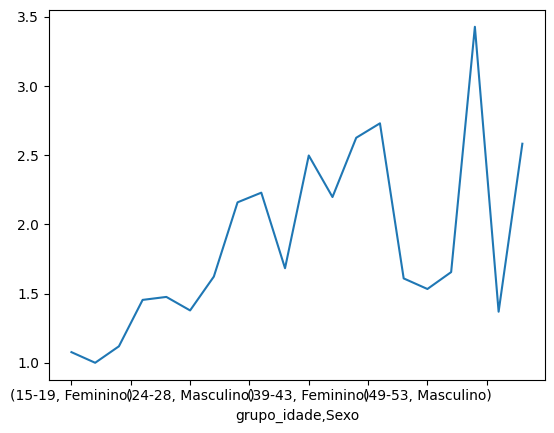

In [98]:
#Média de visita por genêro e faixa etária
visitas_por_grupo = df_combinado_pacientes.groupby(['grupo_idade', 'Sexo'])['Visitas'].mean()
visitas_por_grupo.plot()
plt.show()
# visitas_por_grupo


In [99]:
# Agrupa por faixa etária e calcula o gasto médio por faixa etária e genêrp
#1. Qual é o perfil do cliente ideal? Publico alvo
gastos_por_idade = df_combinado_pacientes.groupby(['grupo_idade','Sexo'])['Faturado'].mean()
print(gastos_por_idade)


grupo_idade  Sexo     
15-19        Feminino     161.953846
             Masculino    157.500000
19-23        Feminino     158.468810
             Masculino    173.160909
24-28        Feminino     174.739815
             Masculino    143.672838
29-33        Feminino     192.775540
             Masculino    180.435562
34-38        Feminino     234.153456
             Masculino    185.595063
39-43        Feminino     244.942258
             Masculino    230.824554
44-48        Feminino     279.788218
             Masculino    224.443654
49-53        Feminino     178.842033
             Masculino    160.052000
54-59        Feminino     168.853109
             Masculino    325.563571
60+          Feminino     156.667315
             Masculino    141.584722
Name: Faturado, dtype: float64


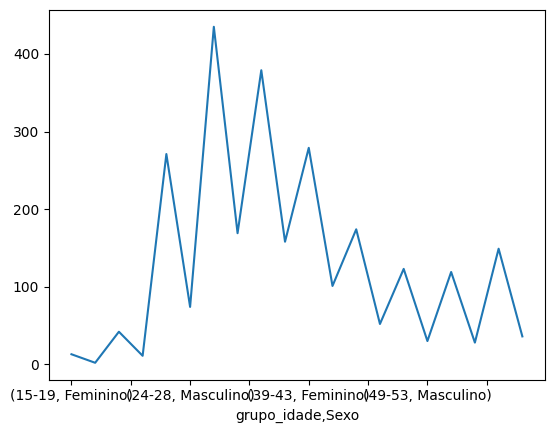

In [100]:
# Agrupando por múltiplas colunas e calculando a média de 'Faturado'
visitas_por_mes = df_combinado_pacientes.groupby(['grupo_idade', 'Sexo'])['Faturado'].count()
visitas_por_mes.plot()
plt.show()


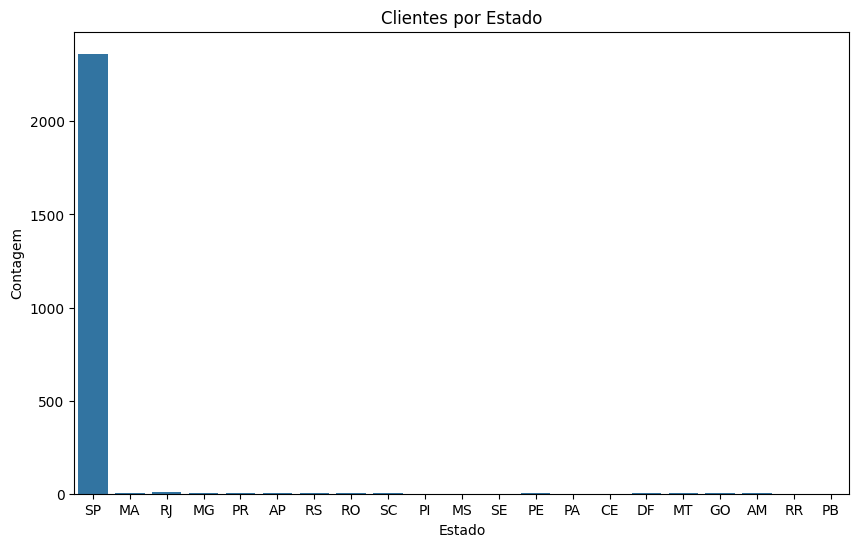

In [101]:
#Definindo tamanho do gráfico
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem
sns.countplot(data = df_combinado_pacientes,
              x = 'Estado')

# definir o título e eixos x e y
plt.title('Clientes por Estado')
plt.xlabel('Estado')
plt.ylabel('Contagem')

plt.show()

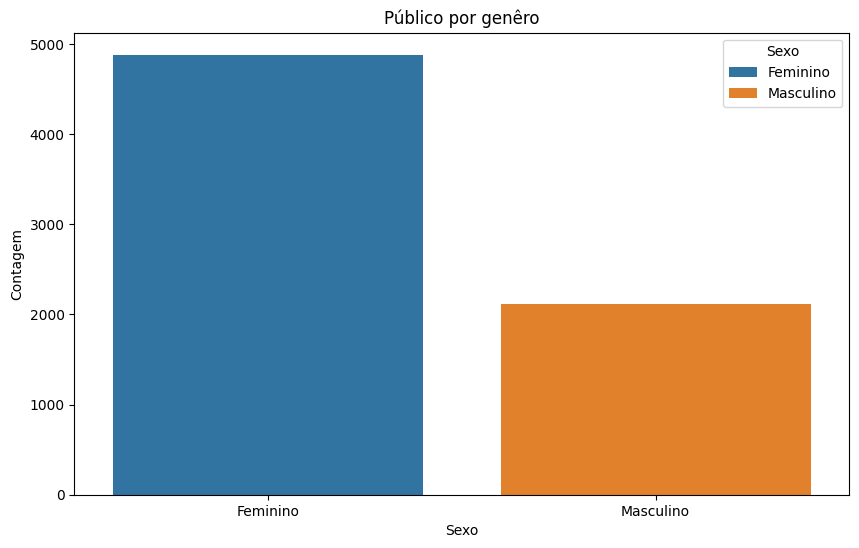

In [102]:
#Definindo tamanho do gráfico
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem
sns.countplot(data = df_combinado_pacientes,
              x = 'Sexo',
              hue = 'Sexo')

# definir o título e eixos x e y
plt.title('Público por genêro')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()

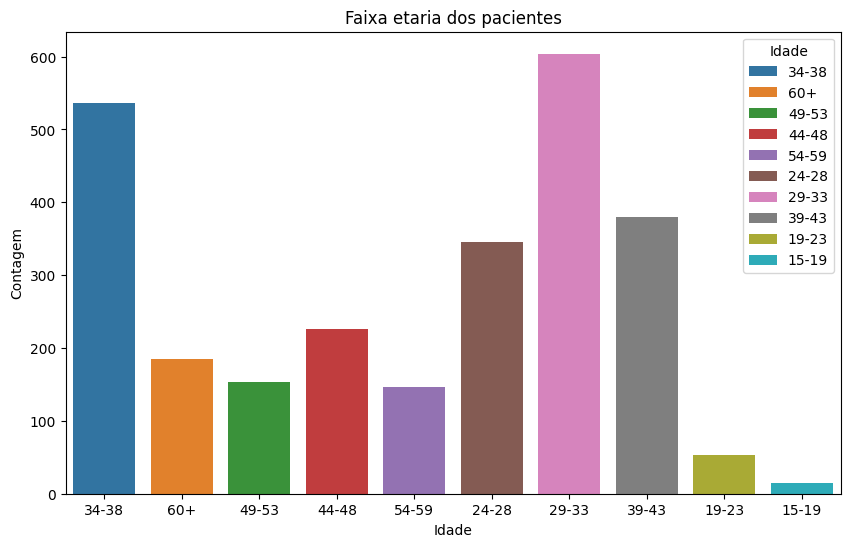

In [103]:
#Definindo tamanho do gráfico
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem
sns.countplot(data = df_combinado_pacientes,
              x = 'grupo_idade',
              hue = 'grupo_idade')

# definir o título e eixos x e y
plt.title('Faixa etaria dos pacientes')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# definir texto da legenda
plt.legend(title = 'Idade')
plt.show()

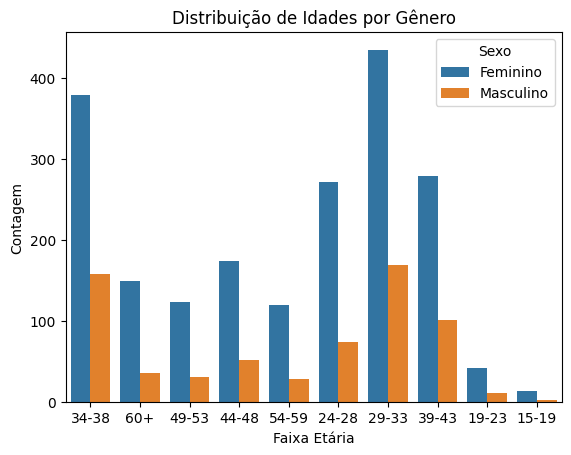

In [104]:
# Gráfico da distribuição da faixa etária por genêro
sns.countplot(x='grupo_idade', hue='Sexo', data=df_combinado_pacientes)
plt.title('Distribuição de Idades por Gênero')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.show()

In [105]:
# Exportando a base final em csv
df_combinado_financeiro.to_csv('Base_final_Financeiro.csv',index=False)
df_combinado_pacientes.to_csv('Base_final_Pacientes.csv',index=False)

In [106]:
df_combinado_pacientes.isnull().sum()

Código                          0
Cidade                       4771
Estado                       4782
Data de Nascimento           4555
Sexo                          210
Saldo                           0
Faturado                        0
Visitas                         0
Ultima Visita                 834
Tempo_Desde_Ultima_Visita       0
Meses                           0
Dias                            0
Idade                        4555
Tipo                            0
grupo_idade                  4559
dtype: int64